<h1>MNIST Handwritten Digit Classification with CNN Neural Networks</h1>

The goal of this project is to perform the task of classification on the MNIST Handwritten Digits Dataset using a CNN Neural Network. We shall do that by using the keras package, and a small GUI is also designed for hyper-paramter tuning. We will build different models and evaluate their performance, and test different CNN hyper-paramters and their effect on the performance of the model. In the end, we will conclude all the results in some tables and compare them. A little visualization is also included, both in showing the classified images and the output of different layers. 

We will load the necessary packages first. We need tensorflow and keras for building the CNN network, and tkinter is a python package for building GUIs.

In [1]:
import tkinter as tk
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import models
import warnings
warnings.filterwarnings("ignore")

C:\Users\Saronian\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Saronian\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Saronian\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Saronian\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

Let's code the GUI first. The GUI is rather simple, it asks the user what the value of each hyper parameter should be, collects them and sets them in the CNN functions(defined later below). The hyper parameters will be the kernel size in the convolutional layer, the number of kernels used, the learning rate for the backpropagation algorithm, and the activation function used in the network. For a matter of simplicity, the number of layers and the order of the layers is not included in the GUI and will be set manually. 

We shall define a list called hyper_parameters first, which will collect the hyper parameters mentioned above from the user and make it accessible for the program.

In [2]:
hyper_parameters = []

Now, let's see how the GUI works. first we'll define a function() that collects the entries from the user with the get() method and appends them to the hyper parameters list defined above. This function should be defined before the body of the GUI, and is called inside the GUI. e1 to e4 are just entry widgets, i.e. fields which the user fills. They are defined later in the program. This function simply gets the entry widget values provided by the user, appends them to the list, and prints the contents.

In [3]:
def function():
    hyper_parameters.append(e1.get())
    hyper_parameters.append(e2.get())
    hyper_parameters.append(e3.get())
    hyper_parameters.append(e4.get())
    print(hyper_parameters)

This is what the GUI looks like:
<img src='GUI.PNG'>

Let's see how it's created in the code snippet below. Line 1 creates a tkinter environment and is the window of the GUI. Lines 2 to 5 create labels for the four fields that the user should fill, and in these lines we provide the name of the fields(the text of the label)and the exact position of the fields in the GUI window. Lines 7 to 10 create entry widgets named e1 to e4, and these are variables that represent the values entered by the user. They are used in the function defined above, and with the get() function we read their contents and save them in the list, for later usage. e1 to e4 are basically those white boxes next to the labels in the above picture. Lines 12 to 15 decide the position of the entry widgets in the GUI window, right next to the field labels. Line 17 defines a button named ok, as you can see in the picture. In that line the position of the button and the text written on it are defined, and also its command or usage is to call the function() which we had defined. When the user fills the fields of the parameters in the GUI and presses the ok button, the function() is activated and the values of the user entry widgets are appended to the hyper parameters list, and printed. Therefore, by pressing the ok button the user submits the values to the program for later processing. Afterwards, the user should close the GUI window.

One last thing to explain is the valid form of entering the kernel size value in the GUI. In the picture provided above an example entry can be seen. By 3 in the kernel size we mean that we have kernels with size 3x3, the rest is trivial. We will have 28 filters in the convolution layer, the learning rate will be 0.001, and the activation function will be relu. I'll explain about the layers and the orderings later.

By running the below code, the GUI window will open. The user will enter the values, press ok and close the window, and the contents will be printed.

In [4]:
master = tk.Tk()
tk.Label(master, text="Kernel Size").grid(row=0)
tk.Label(master, text="Number Of Kernels").grid(row=1)
tk.Label(master, text="Learning Rate").grid(row=2)
tk.Label(master, text="Activation Function").grid(row=3)

e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)

tk.Button(master, text='Ok', command=function).grid(row=4, column=1, sticky=tk.W, pady=4)

master.mainloop()

['3', '28', '0.001', 'relu']


The entries are the ones shown in the picture above, and the contents are displayed. We have exited the GUI. Let's seperately print the contents of the hyper parameters list to see if everything worked correctly and the contents of the entry widgets are still present in the program:

In [5]:
print(hyper_parameters)

['3', '28', '0.001', 'relu']


That's a wrap on the GUI. It's time to design the CNN. I've run and tested different CNNs with several architectures, and selected the best result. A comparison is made and concluded in some tables at the very end of the project. But before that, and to show what I've done and how I've designed any network, the visualizations,etc...,the codes on the optimum resulting architecture will be displayed only. Therefore, the values and hyper parameters seen both in the GUI entries and below are the ones that overall gave the best performance, and for a matter of simplicity, the rest of the trial and errors, the results and the comparisons are just concluded in the tables at the end. 

Before anything, we should load the data and do a train test split. Keras already has the MNIST dataset built-in, and they are already divided into train and test sets, so with load.data() we simply load them and sotre them in the train and test variables:

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
print('Number of images in train set:', x_train.shape[0])
print('Number of images test set:', x_test.shape[0])
print('Shape of training set:',x_train.shape)
print('Shape of test set:',x_test.shape)

Number of images in train set: 60000
Number of images test set: 10000
Shape of training set: (60000, 28, 28)
Shape of test set: (10000, 28, 28)


Visualizing the images is fairly easy. There are 60,000 images in the training set, and each one has an index. Take 8888 for example, by printing its label(y_train) with the corresponding index we see that it is an image of a 3. 
Now, for visualizing this 3, we need to use matplotlib's imshow function used for displaying images. We use the attribute values of this sample,or the pixels(in x_train)with the corresponding image index and see that this is indeed an image of a 3:

3


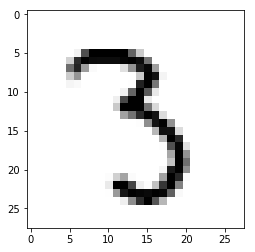

In [8]:
print(y_train[8888]) 
plt.imshow(x_train[8888], cmap='Greys')

There are some small preprocessing steps left to do. As we saw above, the dimensions of the train and test sets are 3, for example, (60000,28,28)means that there are 60000 samples or images in the train sets, and the size of the images are 28x28.
This causes a problem, as keras API accepts 4 dimensional numpy arrays only, therefore lines 1 and 2 reshape the train and test sets to 4-dim arrays by adding a fourth dimension(1). The input shape of the images are now (28,28,1)(as the first element in the 4-dim arrays just show the number of the samples in the sets)which we store in the input_shape variable.

A normalization is also needed before feeding the inputs to the neural network. For that purpose, we need to divide the RGB codes(the attributes)to 255, which is the maximum RGB value. Therefore, lines 5 and 5 convert the sets to floating point numbers to ensure a correct division will happen, and lines 8 and 9 do the normalization by division:

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Now it's time to build the optimal CNN network. Line 1 creates a CNN model environment by using the function Sequential(). It basically configures the model for training(according to the keras documentation). Lines 2 to 9 build the CNN by adding the layers.

For a record, I will mention all the hyper parameters once again. This CNN has one convolutional layer(line 2)with filter size 3x3, and 28 filters, and the nonlinearity function relu(keras merges the two layers used in the convolutional stage into a single layer. The same applies for the pooling stage).The input shape is the one we mentioned above and stored in the variable input_shape,which is the original 28x28 shape of the images. Then it has a maxpooling layer(line 3)with pool size of 2x2. Then it has another convolutional layer(line 4) again with the same kernel sizes and numbers and the same activation function. Then it has another maxpooling layer(line 5)with the same pool size of 2x2. The layers mentioned by far were the convolution stages used for feature abstraction. Then it's time for fully-connected layers. Before those, we have a flattening layer in line 6, which flattens the features into a one dimentional vector and gets it ready to be fed into the fully-connected layers. We have the first fully connected(dense) layer in line 7, which uses the relu activation function and 128 neurons. Before the final output layer, we have a dropout layer with dropout size of 0.2. This layer disregards some neurons(provided by the dropout size) everytime and this way, it fights overfitting. Finally, we have an output fully-connected(dense)layer in line 9, with the activation function of softmax and 10 neurons, representing the 10 digits to be predicted.

The represented network is the one that performed better than any other architecture, as we'll later observe in the tables.

In [10]:
model = Sequential()
model.add(Conv2D(int(hyper_parameters[1]), kernel_size=(int(hyper_parameters[0]),int(hyper_parameters[0])), input_shape=input_shape ,activation=hyper_parameters[3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(int(hyper_parameters[1]), kernel_size=(int(hyper_parameters[0]),int(hyper_parameters[0])), activation=hyper_parameters[3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


One hyper parameter I didn't mention was the learning rate. It is set to 0.001, and is set in the optimizer function. Keras specifies the learning rate in the optimizer function. The function is the type of backpropagation algorithm used for optimizing the weights and reducing the error. There are many functions that can be used, like SGD,RMSprop,etc. But adam has perfomed better and more accurately than any other optimizers in most projects as it converges better and faster(according to the keras documentation), so we'll use that. Line 1 defines the adam optimizer, with the parameter of the learning rate provided. Line 2 compiles the entire model built by far. The adam optimizer is provided, the loss function is set to sparse categorial cross entropy(useful for image classification tasks), and the performance evaluation metric is set to accuracy. Line 3 then fits the model on the training set and begins the learning process.

The number of epochs is set to 10. It may seem little, but the results show that it is enough, and the training accuracy reaches 99 percent after the fourth epoch.

In [11]:
adam=optimizers.Adam(lr=float(hyper_parameters[2]))
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 365s 6ms/step - loss: 0.1669 - acc: 0.9496
Epoch 2/10
60000/60000 [==============================] - 368s 6ms/step - loss: 0.0560 - acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0404 - acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 369s 6ms/step - loss: 0.0326 - acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0257 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0206 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 353s 6ms/step - loss: 0.0182 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 351s 6ms/step - loss: 0.0143 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 359s 6ms/step - loss: 0.0140 - acc: 0.

It's time to test the model on the test set and evaluate the accuracy:

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 19s 2ms/step


[0.03180488928898594, 0.9913]

It is observed that the designed model has reached a test accuracy of 0.9913 and a total error of 0.03, which suggests that this model has a highly desirable performance, and the parameters tuned are suitable for it.

The next step is to visualize one of the predicted labels to show that the model correctly classifies most labels. Take for instance, the image with index 4444 in the test set, which is a 9. In line 1 we plot the image and see that it's a 9, so the plot shows the real image. This image was chosen on purpose because it's not accurately and nicely written, and there is a chance of misclassification by the model. In lines 2 and 3, we predict the label of this sample using our model and store it in y_pred. Then we print the label and as we can see, the model has successfully predicted the label as 3, despite the fact that it wasn't well-written. So, this is an example of the perfomance of our model.

Predicted label: 9


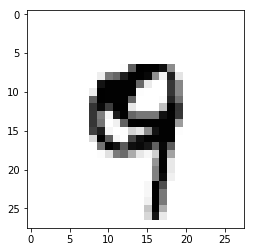

In [13]:
plt.imshow(x_test[4444].reshape(28, 28),cmap='Greys')
y_pred = model.predict(x_test[4444].reshape(1, 28, 28, 1))
print('Predicted label:',y_pred.argmax())

After all we've done, we're interested to visualize the output of each layer(the feature maps outputed by the convolutional filters,etc.). This will give us a vision about how the feature extractor layers convert the raw images and what kinds of features are extracted from them. For that purpose, in line 1 we extract the outputs of the four initial layers of the CNN, namely, two convolutional and two pooling layer outputs. The outputs are originally in the form of a 4-ple tensor made by keras. In line 2, we build a model, and when we give the training images as the input to this model, it will give us these layer outputs. In other words, by feeding the training images to this model, it returns the values of the activation layers in the original CNN model as an output.

In [14]:
layer_outputs = [layer.output for layer in model.layers[:4]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

The following line feeds the training images to this new model, the model predicts the labels, but instead of returning the labels, it returns the outputs of the first 4 layers in the form of 4 numpy arrays, and we append them to the array activations. In the next parts, we will plot the images for each filter of each layer.

In [15]:
activations = activation_model.predict(x_train)

These are the feature maps produced by each filter in the first convolutional layer:

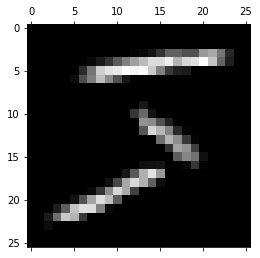

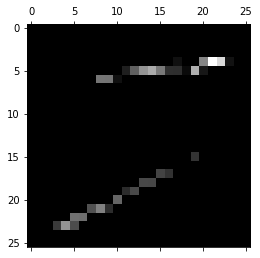

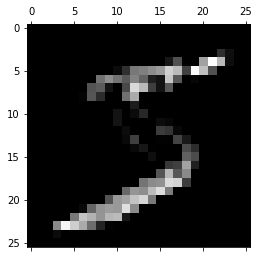

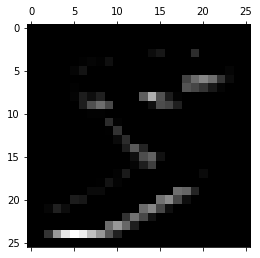

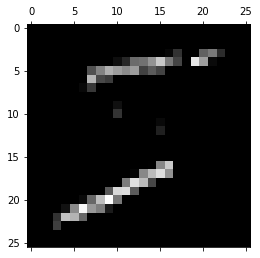

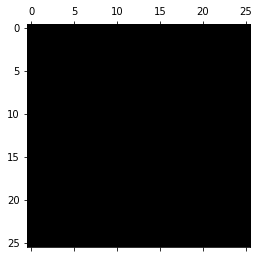

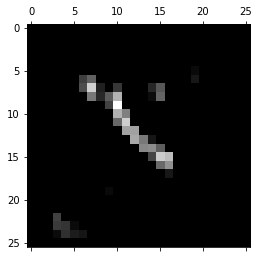

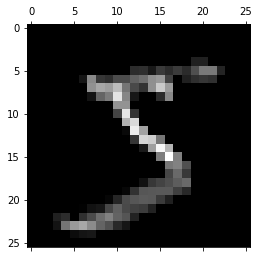

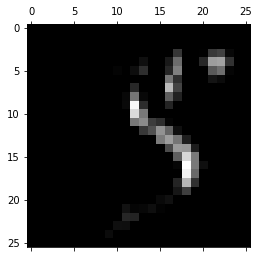

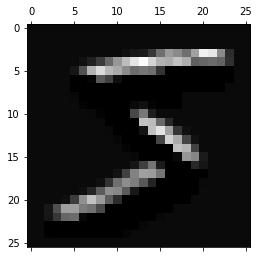

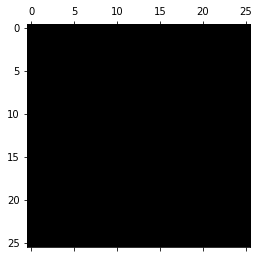

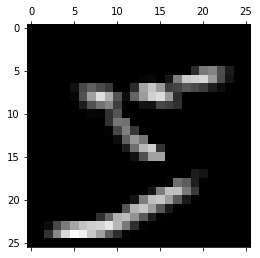

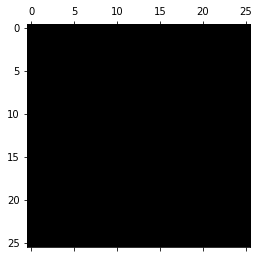

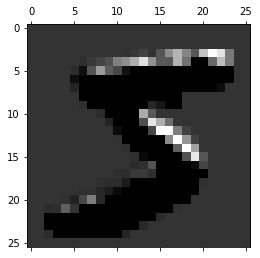

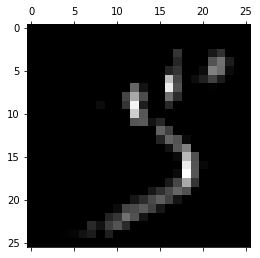

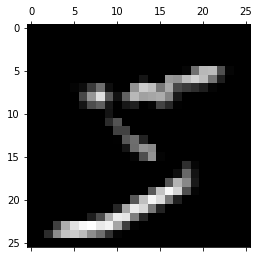

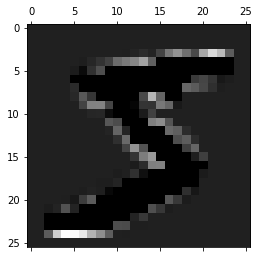

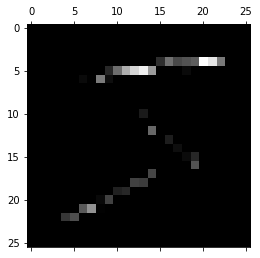

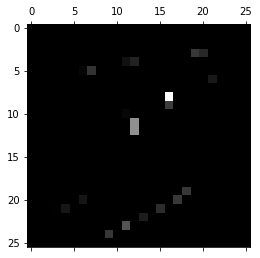

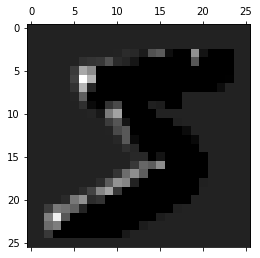

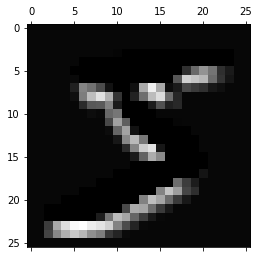

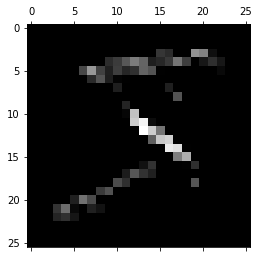

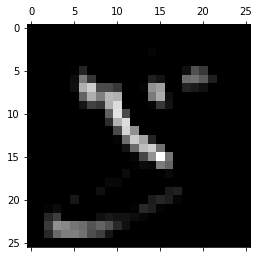

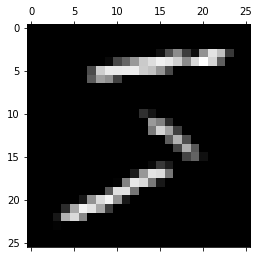

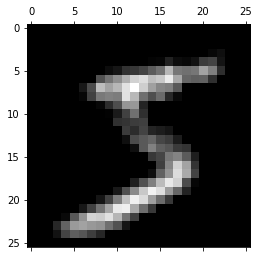

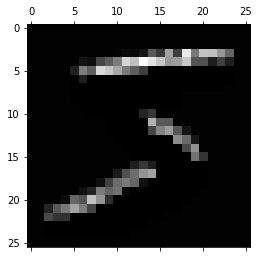

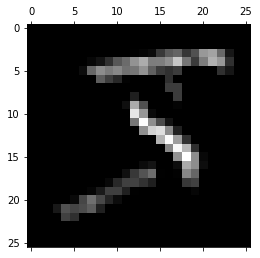

In [16]:
first_layer_activation = activations[0]
for i in range(1,28):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='gray')

These are the feature maps maxpooled by the first pooling layer:

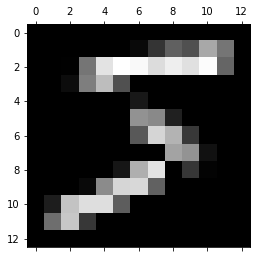

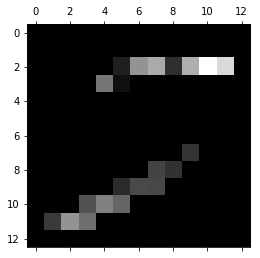

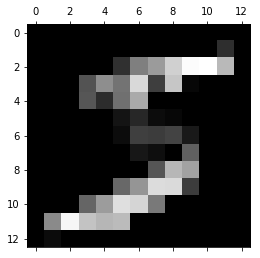

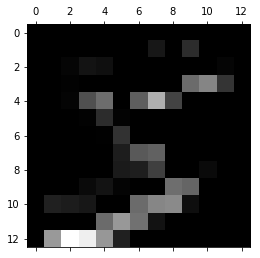

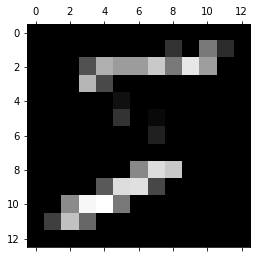

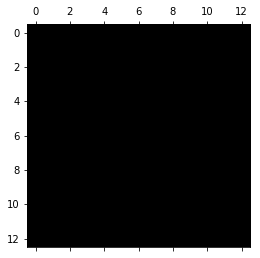

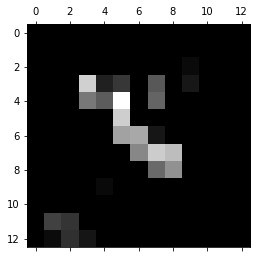

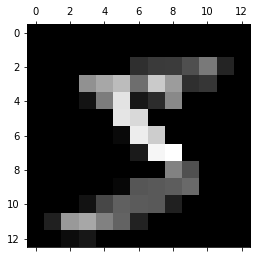

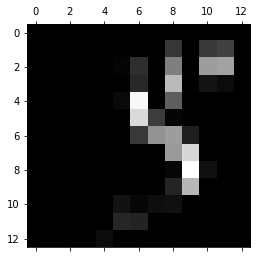

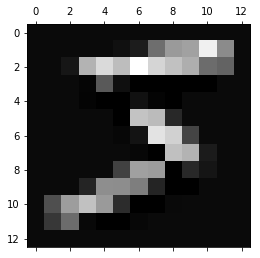

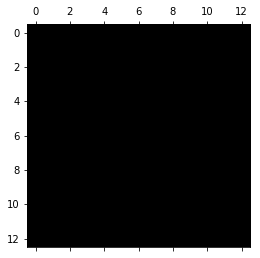

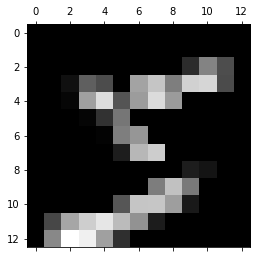

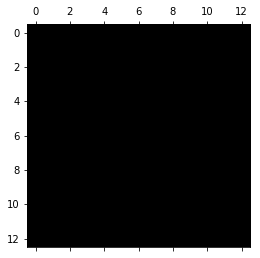

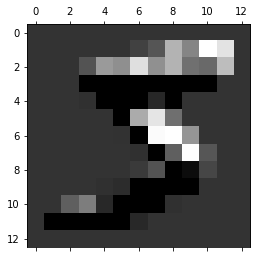

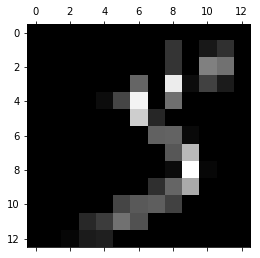

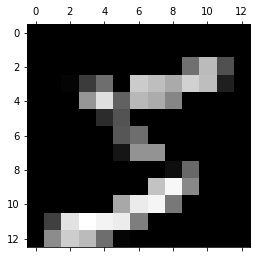

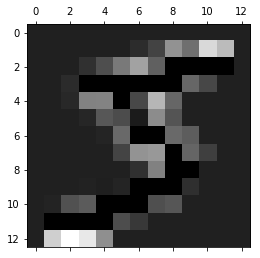

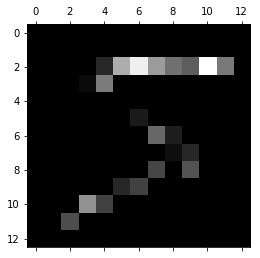

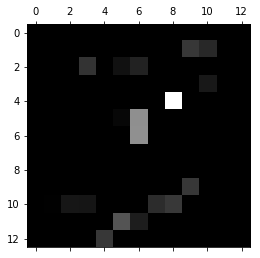

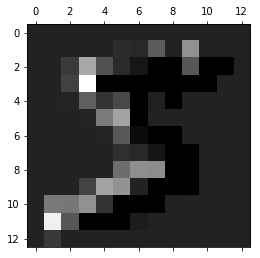

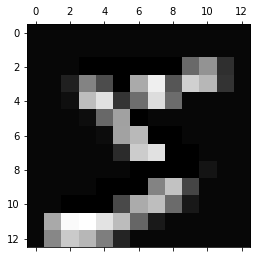

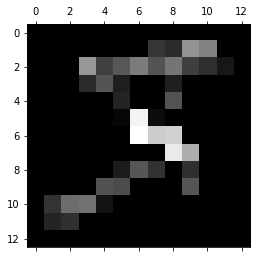

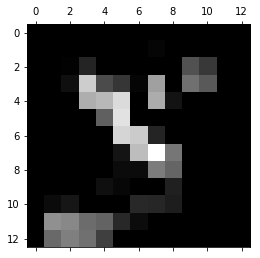

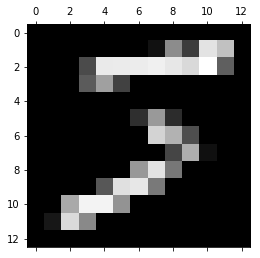

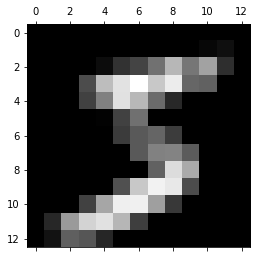

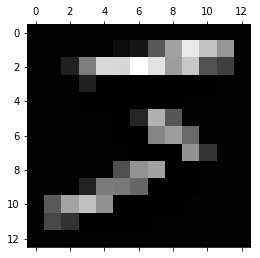

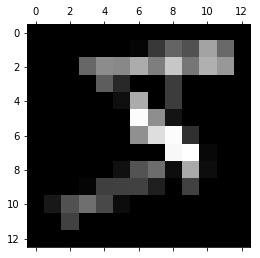

In [17]:
second_layer_activation = activations[1]
for i in range(1,28):
    plt.matshow(second_layer_activation[0, :, :, i], cmap='gray')

These are the feature maps produced by each filter in the second convolutional layer:

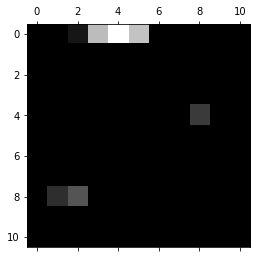

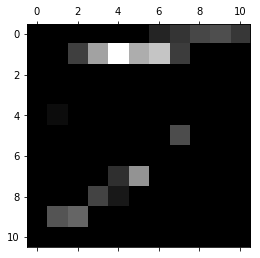

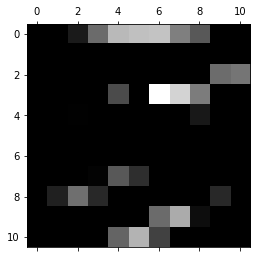

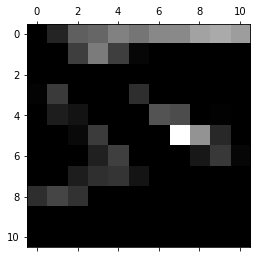

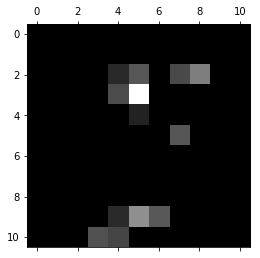

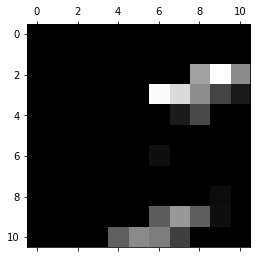

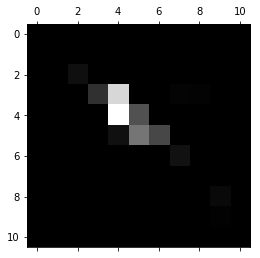

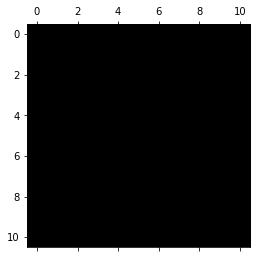

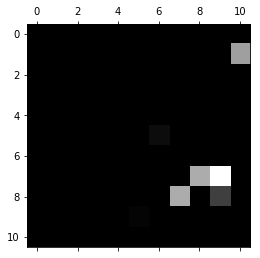

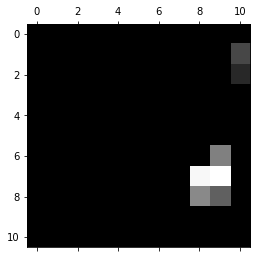

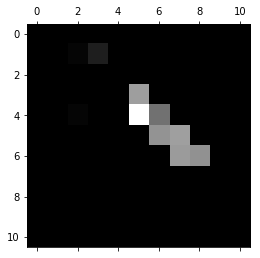

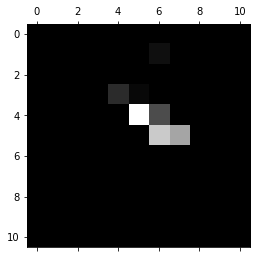

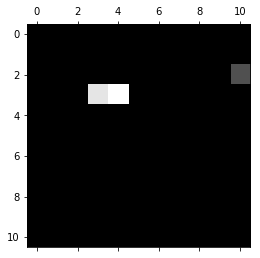

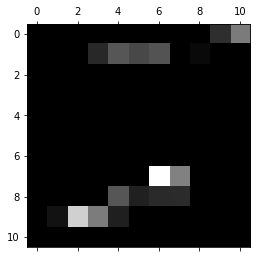

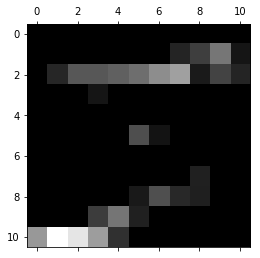

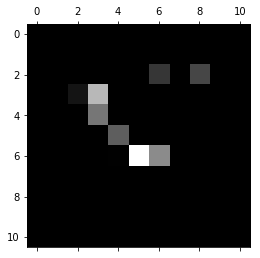

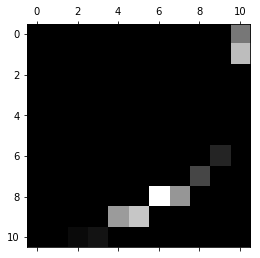

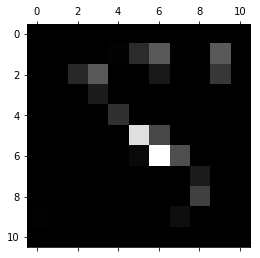

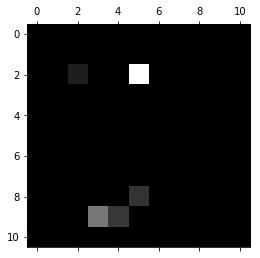

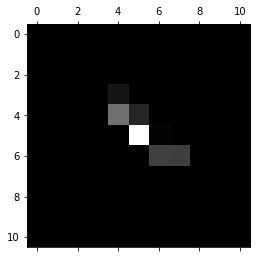

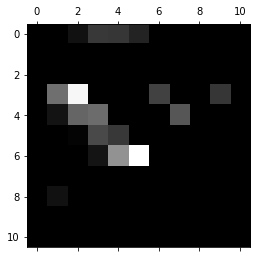

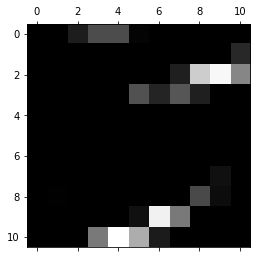

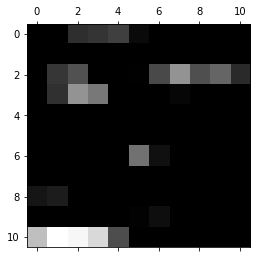

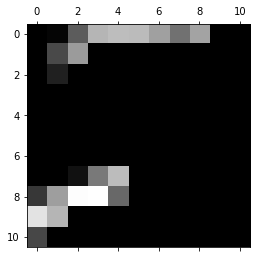

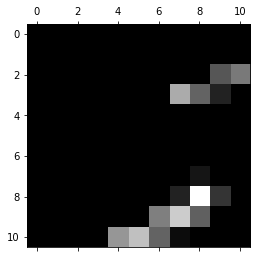

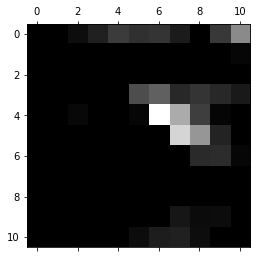

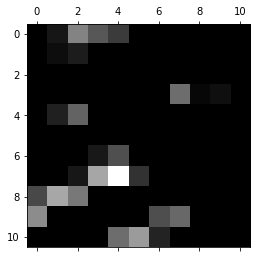

In [18]:
third_layer_activation = activations[2]
for i in range(1,28):
    plt.matshow(third_layer_activation[0, :, :, i], cmap='gray')

These are the feature maps maxpooled by the second pooling layer:

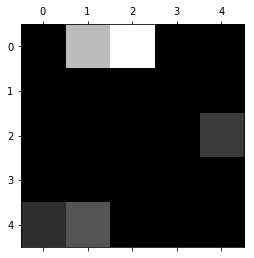

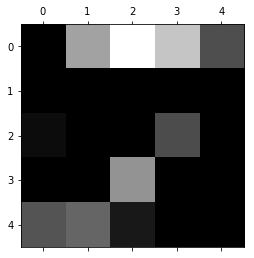

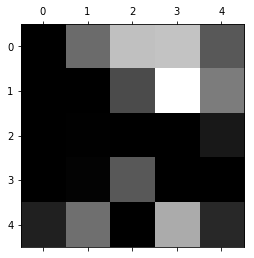

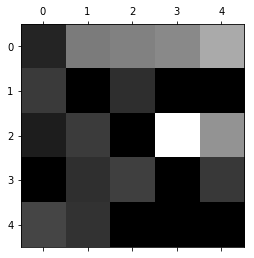

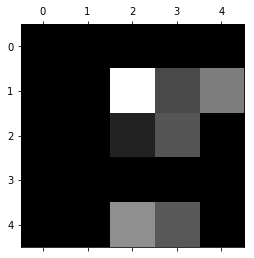

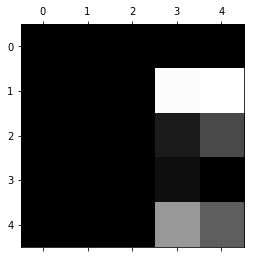

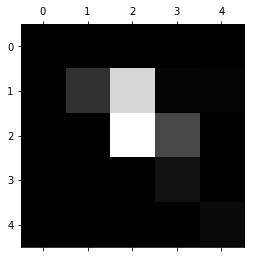

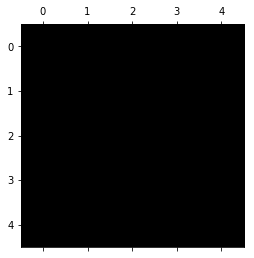

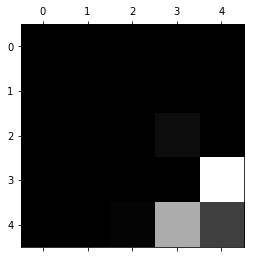

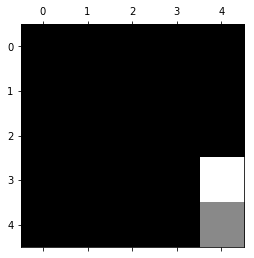

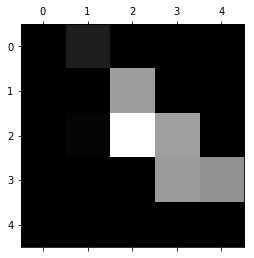

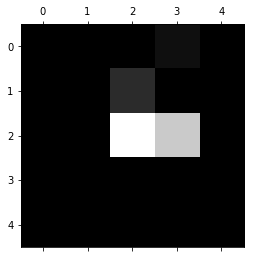

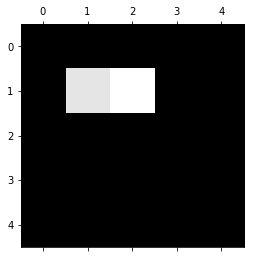

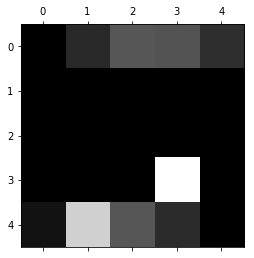

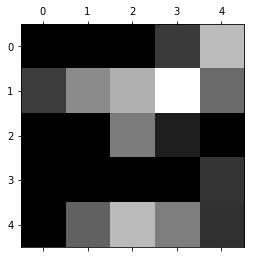

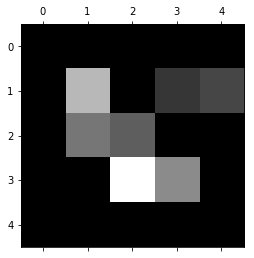

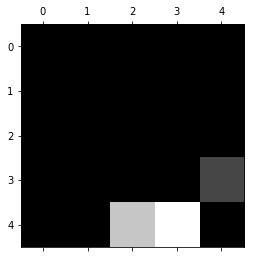

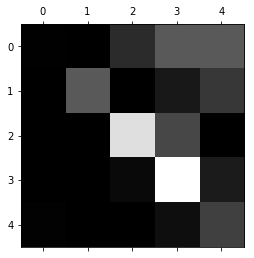

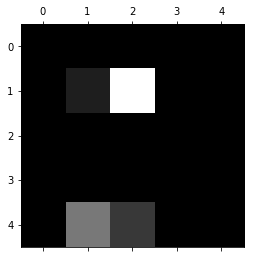

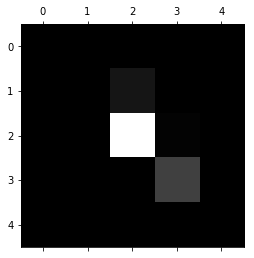

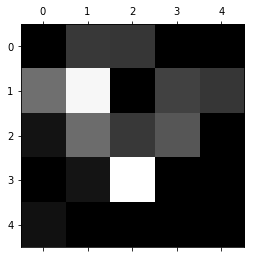

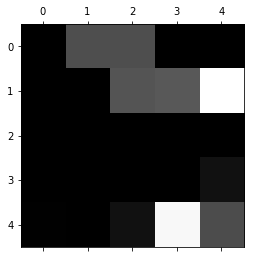

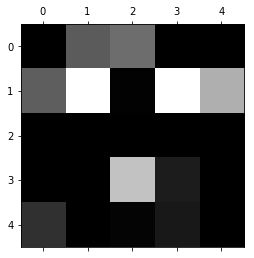

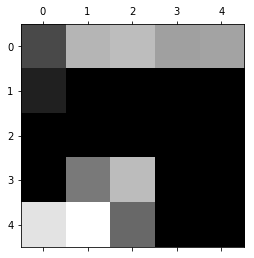

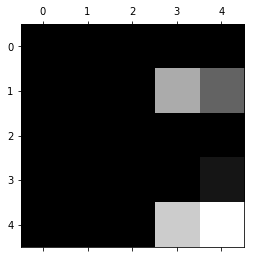

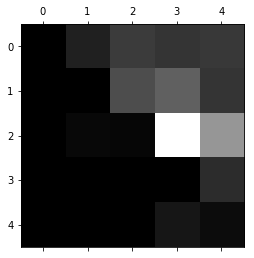

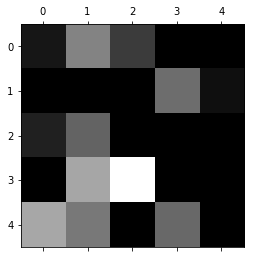

In [19]:
fourth_layer_activation = activations[3]
for i in range(1,28):
    plt.matshow(fourth_layer_activation[0, :, :, i], cmap='gray')

We can clearly observe the feature abstraction process and the creation of higher level features in the feature maps produced by each layer.

For the last part, let's observe the accuracy results and the performance of models by using different architectures. Each of the hyper parameters have changed during the testing and the rest of the parameters have been kept constant. We can see the accuracy of the model classification on different kernel sizes, number of kernels, learning rates, activation functions, and numbers and orderings of layers:

| Kernel Size | Accuracy | 
| --- | --- |
| 1x1 | 0.974 | 
| 3x3 | 0.9877 |
| 5x5 | 0.989 |

| Number of Kernels | Accuracy | 
| --- | --- |
| 28 | 0.9877 | 
| 44 | 0.9879 |
| 64 | 0.9893 |

| Nonlinear Function | Accuracy | 
| --- | --- |
| relu | 0.9877 | 
| softmax | 0.9791 |
| tanh | 0.9852 |
| sigmoid | 0.1135 |
| exponensial | 0.1135 |

| Learning Rate | Accuracy | 
| --- | --- |
| 0.00001 | 0.9454 | 
| 0.0001 | 0.9816 |
| 0.001 | 0.9828 |
| 0.01 | 0.9223 | 
| 0.1 | 0.1135 |
| 1 | 0.11 |

Note that I haven't changed the order and number of flatten,dropout, and dense layers in the network, and all changes have been applied to the convolution and pooling layers and their orders. The number of layers and their corresponding orders are summarized in the following table:

| Number of Layers | Accuracy | 
| --- | --- |
| 1 Convolutional layer-1 maxpooling layer | 0.9877 | 
| 1 Convolutional layer-1 maxpooling layer-1 Convolutional layer-1 maxpooling layer | 0.9912 |
| 1 Convolutional layer-1 maxpooling layer-1 Convolutional layer-1 maxpooling layer-1 Convolutional layer-1 maxpooling layer | 0.9845 |
| 1 Convolutional layer-1 Convolutional layer-1 maxpooling layer | 0.9906 |
| 1 Convolutional layer-1 Convolutional layer-1 Convolutional layer-1 maxpooling layer | 0.991 |

From the tables above, we can summarize that increasing the size of the kernel may increase the accuracy to some point, but larger kernel sizes are computationally expensive and capture less information. Therefore, kernel sizes of 3x3 or 5x5 are desirable. The same applies for the number of kernels. Increasing the number from 28 to 64 leads to a better accuracy, but the risk of overfitting highly increases as we have more weights and parameters in the network and also the speed of the computations become extremely slow, that's why a kernel size of 28 is sufficient. From the aspect of activation functions, relu, softmax and tanh give very good results, with relu being the best. On the other hand the sigmoid and exponensial functions give very bad results, with almost no accuracy, and therefore shall not be used. The learning rates are also observed, and increasing the learning rate from 0.00001 to 0.0001 increases the accuracy, with 0.001 being the optimum rate, and increasing the rate furthermore decreases the performance and accuracy, with 0.1 and 1 giving horrible results, as the model bounces back and forth and gets stuck in local minimums a lot, that's why we have a very low accuracy. Finally, from the aspect of layers and their orderings, we can observe the last two elements of the table, where we've changed the order of the layers, and conclude that changing the orders doesn't lead to any difference in the performance of the layer, and therefore the ordering doesn't matter. Also, by looking at the first three elements we see that the model with 2 convolutional and 2 maxpooling layers gives the greatest performance, but increasing the layers by 3 leads to a drop in the accuracy, therefore the model using 2 convolutional and 2 maxpooling layers is the optimal model.

That's a wrap on different hyper parameters and architectures for the CNN network.